# Análise de dados voltada à detecção de eventos anômalos e ataques em redes de comunicação

# Aprendizado Não Supervisionado

Aluno: Guilherme de Almeida do Carmo

Orientador: Luiz Fernando Carvalho

In [4]:
# Bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams

# Preparação dos dados utilizados

In [6]:
# Le os datasets de treino e teste, respectivamente
df_train = pd.read_csv('C:\\Users\\guiia\\OneDrive\\Documentos\\IC_1\\dados_cicddos2019\\treinamento_cicddos2019.csv')
df_test = pd.read_csv('C:\\Users\\guiia\\OneDrive\\Documentos\\IC_1\\dados_cicddos2019\\teste_cicddos2019.csv')

# Coluna a ser desconsiderada
del df_test['Unnamed: 0']

# Cria variaveis de entrada e de saida
X = df_train.drop(' Label', axis = 1)
y = df_train[' Label']

## Dataset utilizado
* Problema de Classificação
* No dataset, a coluna "Label", que agora é a variável de saída, representa os ataques que ocorreram na rede

In [7]:
# Primeiras 15 linhas do dataset
df_test.head(n=15)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,3.756993,0.488582,3.338476,0.458445,3.798505,0.343780,508317528,1.753001e+05,2.086957,0.043478,...,0.000000,0.021739,0.021739,1.739398e+05,0.000000,1.739398e+05,1.739398e+05,0.595400,0.934783,1
1,4.919981,0.628274,4.356312,0.668750,4.839029,0.482539,508317528,4.497374e+06,2.795620,0.277372,...,5984.259500,23365.240876,2641.218978,2.009855e+06,109492.456256,2.087973e+06,1.917833e+06,0.667323,0.934307,1
2,4.718499,0.513442,4.426268,0.652470,4.473980,0.376770,508317528,9.916249e+06,3.428571,1.267857,...,1181.485486,10276.107143,6287.410714,3.712369e+06,222830.725194,3.869251e+06,3.548468e+06,0.735032,0.875000,1
3,4.543295,0.199904,4.152334,0.234966,4.508233,0.175975,508317528,2.042906e+06,2.542553,0.617021,...,403.582537,2363.617021,1084.542553,4.321098e+05,882.517349,4.324916e+05,4.295558e+05,0.641317,0.957447,1
4,4.584967,0.617035,4.273378,0.800042,4.359523,0.406899,499671137,6.383978e+06,5.989796,5.132653,...,31225.970704,85822.173469,4742.367347,1.347777e+06,123584.594133,1.422363e+06,1.179181e+06,0.682908,0.846939,1
5,4.727388,0.501517,4.123561,0.746721,4.452405,0.391569,499671137,8.829840e+06,4.256637,2.380531,...,914.110871,6581.672566,4441.309735,1.493719e+06,215549.206126,1.772594e+06,1.291217e+06,0.659844,0.858407,1
6,4.574711,0.100437,4.021002,0.114728,4.574711,0.100437,499671137,2.777314e+05,2.072165,0.082474,...,0.000000,705.113402,705.113402,2.104292e+05,0.000000,2.104292e+05,2.104292e+05,0.626558,0.979381,1
7,4.709530,0.051397,4.161172,0.051397,4.709530,0.051397,499671137,1.200575e+05,2.045045,0.036036,...,0.000000,221.837838,221.837838,9.199453e+04,0.000000,9.199453e+04,9.199453e+04,0.564796,0.990991,1
8,4.595120,0.169226,3.919907,0.225238,4.547826,0.169226,499671137,5.349461e+05,2.151515,0.161616,...,0.000000,1093.555556,1093.555556,4.125629e+05,0.000000,4.125629e+05,4.125629e+05,0.629282,0.959596,1
9,4.703075,0.330140,4.382371,0.330140,4.735440,0.247902,499671137,9.097627e+02,1.966102,0.127119,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.672318,0.974576,1


In [8]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
# Normalizar
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA - Análise dos Componentes Principais

* Dados em muitas dimensões
* Redução da dimensionalidade considerando a variância

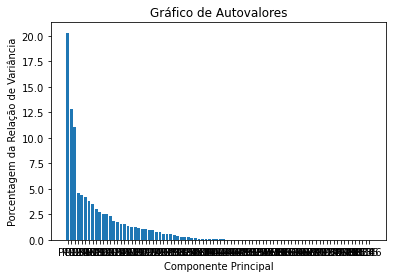

In [10]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Relação de variância
explained_variance = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(explained_variance)+1)]

# Grafico com PCA
plt.bar(x=range(1,len(explained_variance)+1), height=explained_variance, tick_label=labels)
plt.ylabel('Porcentagem da Relação de Variância')
plt.xlabel('Componente Principal')
plt.title('Gráfico de Autovalores')
plt.show()

### Diminuindo a quantidade de componentes no gráfico para melhorar a visualização

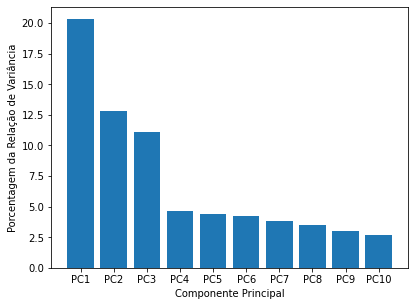

In [11]:
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

rcParams['figure.figsize'] = 6.4, 4.8

# Relação de variância
explained_variance = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(explained_variance)+1)]

# Grafico com PCA de 10 componentes
plt.bar(x=range(1,len(explained_variance)+1), height=explained_variance, tick_label=labels)
plt.ylabel('Porcentagem da Relação de Variância')
plt.xlabel('Componente Principal')
#plt.title('Gráfico de Autovalores 10 Componentes Principais')
plt.show()

## Gráfico de dispersão

### Relação entre os dois principais componentes de acordo com a variância

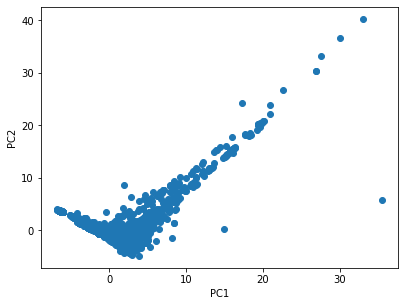

In [12]:
# Scatter Plot
pca_df = pd.DataFrame(X_test, y_test, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
#plt.title('Gráfico do PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Treinamento e Previsão

## Utilizando Random Forest

* Criação de muitas árvores para a previsão do resultado
* Árvores criadas a partir de atributos aleatórios

In [13]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Previsao
y_pred = clf.predict(X_test)

## Desempenho

In [14]:
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusao: \n', cm, '\n')

# Acurácia
print('Acuracia:', accuracy_score(y_test, y_pred))

Matriz de confusao: 
 [[1773   64]
 [ 263 2880]] 

Acuracia: 0.9343373493975904


# Agrupamento Hierárquico

## Dendrograma
* Diagrama dos agrupamentos
* Método Ward

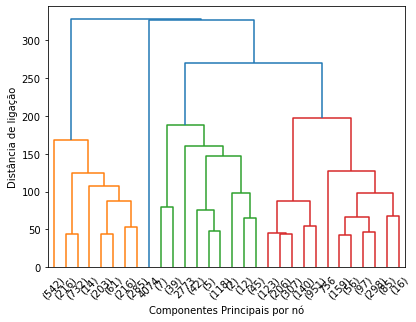

In [15]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'), truncate_mode='lastp')
#plt.title('Dendograma do Clustering Hierárquico com método Ward')
plt.xlabel('Componentes Principais por nó')
plt.ylabel('Distância de ligação')
plt.show()

## Plotagem do gráfico relacionando os principais componentes com abordagem aglomerativa

* 3 Clusters considerados
* Distância Euclideana
* Método Ward

### Distância Euclidiana

#### √((diferença das distâncias 1)² + (diferença das distâncias 2)² + (diferença das distâncias n)²)

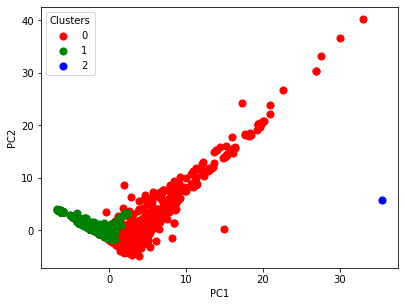

In [16]:
# Criando a instância com distancia Euclideana e 3 clusters
model = AgglomerativeClustering(n_clusters=3,
        affinity='euclidean', linkage='ward')
model.fit(X_test)
labels = model.labels_

rcParams['figure.figsize'] = 6.4, 4.8

# Plotando os clusters
plt.scatter(X_test[labels==0, 0], X_test[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X_test[labels==1, 0], X_test[labels==1, 1], s=50, marker='o', color='green')
plt.scatter(X_test[labels==2, 0], X_test[labels==2, 1], s=50, marker='o', color='blue')
#plt.title('Gráfico do PCA com 3 clusters e Agglomerative Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(np.unique(labels), title='Clusters')
plt.show()

## Plotando os clusters do Agglomerative Clustering em um gráfico 3D

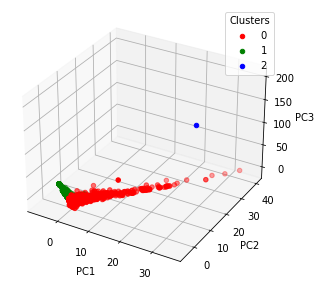

In [17]:
fig = plt.figure(figsize=(5,5))

# Projeção 3D para criar o gráfico
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[labels==0,0], X_test[labels==0,1], X_test[labels==0,2], c='red')
axis.scatter(X_test[labels==1,0], X_test[labels==1,1], X_test[labels==1,2], c='green')
axis.scatter(X_test[labels==2,0], X_test[labels==2,1], X_test[labels==2,2], c='blue')
#axis.set_title('Relação dos principais componentes com Agglomerative Clustering')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labels), title='Clusters')

### Rotacionando o plot 3D para melhor visualização

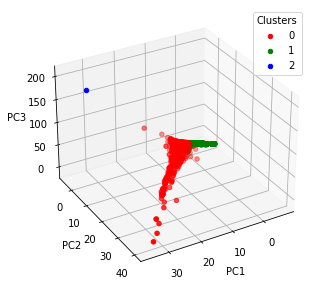

In [18]:
fig = plt.figure(figsize=(5,5))

# Projeção 3D para criar o gráfico
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[labels==0,0], X_test[labels==0,1], X_test[labels==0,2], c='red')
axis.scatter(X_test[labels==1,0], X_test[labels==1,1], X_test[labels==1,2], c='green')
axis.scatter(X_test[labels==2,0], X_test[labels==2,1], X_test[labels==2,2], c='blue')
#axis.set_title('Relação dos principais componentes com Agglomerative Clustering')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labels), title='Clusters')
axis.view_init(30, 60)

#### Vista no sentido positivo de PC3

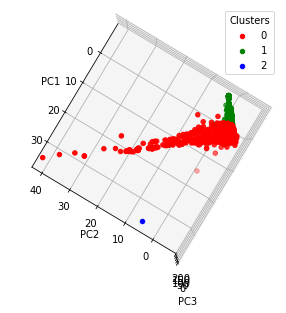

In [19]:
fig = plt.figure(figsize=(5,5))

# Projeção 3D para criar o gráfico
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[labels==0,0], X_test[labels==0,1], X_test[labels==0,2], c='red')
axis.scatter(X_test[labels==1,0], X_test[labels==1,1], X_test[labels==1,2], c='green')
axis.scatter(X_test[labels==2,0], X_test[labels==2,1], X_test[labels==2,2], c='blue')
#axis.set_title('Relação dos principais componentes com Agglomerative Clustering')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labels), title='Clusters')
axis.view_init(-90, 150)

#### Vista no sentido negativo de PC3

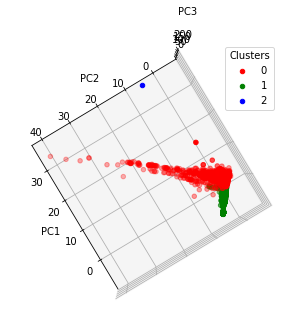

In [20]:
fig = plt.figure(figsize=(5,5))

# Projeção 3D para criar o gráfico
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[labels==0,0], X_test[labels==0,1], X_test[labels==0,2], c='red')
axis.scatter(X_test[labels==1,0], X_test[labels==1,1], X_test[labels==1,2], c='green')
axis.scatter(X_test[labels==2,0], X_test[labels==2,1], X_test[labels==2,2], c='blue')
#axis.set_title('Relação dos principais componentes com Agglomerative Clustering')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labels), title='Clusters')
axis.view_init(90, 150)

# K-Means
* Inicializa centróides aleatoriamente
* Associa cada ponto ao centróide mais próximo
* Define novos centróides a partir da média dos pontos ligados

## Definindo o número de clusters com Elbow Method
* O número ideal de clusters se encontra no "cotovelo" do gráfico

(array([ 50000., 100000., 150000., 200000., 250000., 300000., 350000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

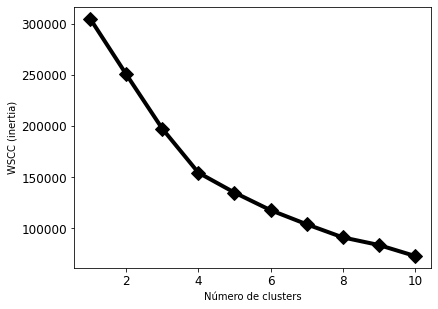

In [21]:
wscc = []

# Considerando 10 diferentes números de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_test)
    wscc.append(kmeans.inertia_)

# Plotando o gráfico do Elbow Method
plt.plot(range(1, 11), wscc, linewidth=4, color='black', marker='D', markersize=10)
#plt.title("Gráfico do Elbow Method")
plt.xlabel("Número de clusters")
plt.ylabel("WSCC (inertia)")
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

<function matplotlib.pyplot.show(close=None, block=None)>

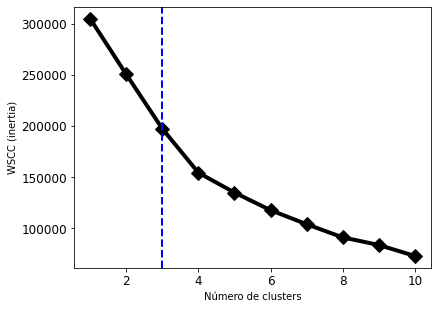

In [22]:
# Depois de analisar o Elbow Method
plt.plot(range(1, 11), wscc, linewidth=4, color='black', marker='D', markersize=10)
#plt.title("Gráfico do Elbow Method")
plt.xlabel("Número de clusters")
plt.ylabel("WSCC (inertia)")
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

number_of_clusters = 3
plt.axvline(x=number_of_clusters, linewidth=2, color='blue', linestyle='--')
plt.show

## Definindo o número de clusters com Silhouette
* Definindo uma distância de -1 a 1, o número de clusters ideal é o que mais se aproxima do resultado de 1
* O valor é calculado a partir da média do coeficiente Silhouette: (b-a)/max(a, b), onde a é a distância média das outras instâncias no mesmo cluster

In [23]:
labelsKmeans = kmeans.labels_

from sklearn.metrics import silhouette_score

silhouette_score(X_test, labelsKmeans)

0.4152082011312591

In [24]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X_test) for k in range(1, 10)]

silhouette_scores = [silhouette_score(X_test, a.labels_) for a in kmeans_per_k[1:]]

silhouette_scores

[0.3176228922719362,
 0.32075523021832275,
 0.3519072896905759,
 0.3475156145185122,
 0.38024077519917887,
 0.4004671060403378,
 0.41349662664420594,
 0.4153645229333578]

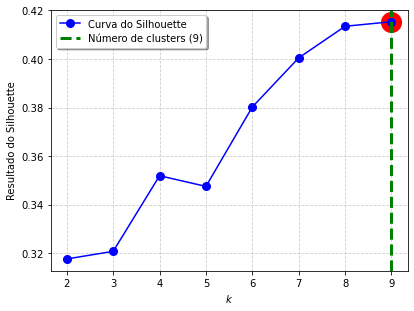

In [25]:
# Plotando o gráfico dos resultados do Silhouette
rcParams['figure.figsize'] = 6.4, 4.8

plt.plot(range(2, 10), silhouette_scores, "bo-", color='blue', markersize=8, label='Curva do Silhouette')
plt.xlabel("$k$")
plt.ylabel("Resultado do Silhouette")
plt.grid(which='major', color='#cccccc', linestyle='--')

#plt.title('Curva do Silhouette para previsão do número de clusters')

# Calculando o número de clusters
k = np.argmax(silhouette_scores) + 2

# Linha vertical no marcador do número de clusters
plt.axvline(x=k, linestyle='--', c='green', linewidth=3, label='Número de clusters ({})'.format(k))

plt.scatter(k, silhouette_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show()

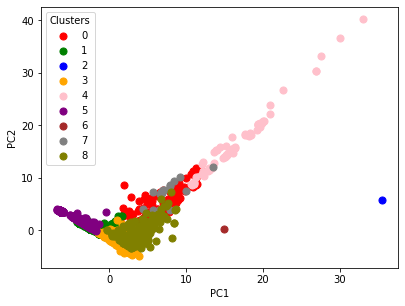

In [26]:
# KMeans com 9 clusters
kmeans = KMeans(n_clusters=9)

rcParams['figure.figsize'] = 6.4, 4.8

# Plotando os clusters
plt.scatter(X_test[labelsKmeans==0, 0], X_test[labelsKmeans==0, 1], s=50, marker='o', color='red')
plt.scatter(X_test[labelsKmeans==1, 0], X_test[labelsKmeans==1, 1], s=50, marker='o', color='green')
plt.scatter(X_test[labelsKmeans==2, 0], X_test[labelsKmeans==2, 1], s=50, marker='o', color='blue')
plt.scatter(X_test[labelsKmeans==3, 0], X_test[labelsKmeans==3, 1], s=50, marker='o', color='orange')
plt.scatter(X_test[labelsKmeans==4, 0], X_test[labelsKmeans==4, 1], s=50, marker='o', color='pink')
plt.scatter(X_test[labelsKmeans==5, 0], X_test[labelsKmeans==5, 1], s=50, marker='o', color='purple')
plt.scatter(X_test[labelsKmeans==6, 0], X_test[labelsKmeans==6, 1], s=50, marker='o', color='brown')
plt.scatter(X_test[labelsKmeans==7, 0], X_test[labelsKmeans==7, 1], s=50, marker='o', color='gray')
plt.scatter(X_test[labelsKmeans==8, 0], X_test[labelsKmeans==8, 1], s=50, marker='o', color='olive')
#plt.title('Gráfico do PCA com 9 clusters e K-Means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(np.unique(labelsKmeans), title='Clusters')
plt.show()

## Plotando os clusters do K-Means em um gráfico 3D

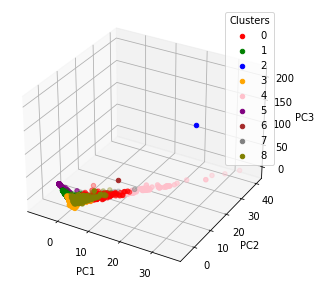

In [27]:
fig = plt.figure(figsize=(5,5))

# Projeção 3D para criar o gráfico
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[labelsKmeans==0,0], X_test[labelsKmeans==0,1], X_test[labelsKmeans==0,2], c='red')
axis.scatter(X_test[labelsKmeans==1,0], X_test[labelsKmeans==1,1], X_test[labelsKmeans==1,2], c='green')
axis.scatter(X_test[labelsKmeans==2,0], X_test[labelsKmeans==2,1], X_test[labelsKmeans==2,2], c='blue')
axis.scatter(X_test[labelsKmeans==3,0], X_test[labelsKmeans==3,1], X_test[labelsKmeans==3,2], c='orange')
axis.scatter(X_test[labelsKmeans==4,0], X_test[labelsKmeans==4,1], X_test[labelsKmeans==4,2], c='pink')
axis.scatter(X_test[labelsKmeans==5,0], X_test[labelsKmeans==5,1], X_test[labelsKmeans==5,2], c='purple')
axis.scatter(X_test[labelsKmeans==6,0], X_test[labelsKmeans==6,1], X_test[labelsKmeans==6,2], c='brown')
axis.scatter(X_test[labelsKmeans==7,0], X_test[labelsKmeans==7,1], X_test[labelsKmeans==7,2], c='gray')
axis.scatter(X_test[labelsKmeans==8,0], X_test[labelsKmeans==8,1], X_test[labelsKmeans==8,2], c='olive')
#axis.set_title('Relação dos principais componentes com K-Means')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labelsKmeans), title='Clusters')

### Rotacionando o plot 3D para melhor visualização 

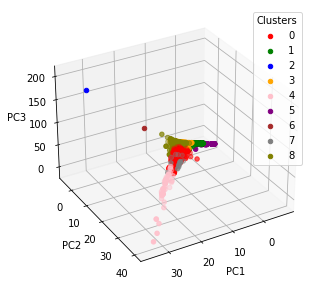

In [28]:
fig = plt.figure(figsize=(5,5))

# Projeção 3D para criar o gráfico
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[labelsKmeans==0,0], X_test[labelsKmeans==0,1], X_test[labelsKmeans==0,2], c='red')
axis.scatter(X_test[labelsKmeans==1,0], X_test[labelsKmeans==1,1], X_test[labelsKmeans==1,2], c='green')
axis.scatter(X_test[labelsKmeans==2,0], X_test[labelsKmeans==2,1], X_test[labelsKmeans==2,2], c='blue')
axis.scatter(X_test[labelsKmeans==3,0], X_test[labelsKmeans==3,1], X_test[labelsKmeans==3,2], c='orange')
axis.scatter(X_test[labelsKmeans==4,0], X_test[labelsKmeans==4,1], X_test[labelsKmeans==4,2], c='pink')
axis.scatter(X_test[labelsKmeans==5,0], X_test[labelsKmeans==5,1], X_test[labelsKmeans==5,2], c='purple')
axis.scatter(X_test[labelsKmeans==6,0], X_test[labelsKmeans==6,1], X_test[labelsKmeans==6,2], c='brown')
axis.scatter(X_test[labelsKmeans==7,0], X_test[labelsKmeans==7,1], X_test[labelsKmeans==7,2], c='gray')
axis.scatter(X_test[labelsKmeans==8,0], X_test[labelsKmeans==8,1], X_test[labelsKmeans==8,2], c='olive')
#axis.set_title('Relação dos principais componentes com K-Means')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labelsKmeans), title='Clusters')
axis.view_init(30, 60)

#### Vista no sentido positivo de PC3

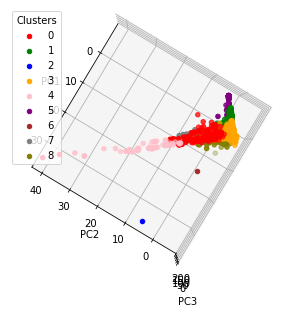

In [29]:
fig = plt.figure(figsize=(5,5))

# Projeção 3D para criar o gráfico
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[labelsKmeans==0,0], X_test[labelsKmeans==0,1], X_test[labelsKmeans==0,2], c='red')
axis.scatter(X_test[labelsKmeans==1,0], X_test[labelsKmeans==1,1], X_test[labelsKmeans==1,2], c='green')
axis.scatter(X_test[labelsKmeans==2,0], X_test[labelsKmeans==2,1], X_test[labelsKmeans==2,2], c='blue')
axis.scatter(X_test[labelsKmeans==3,0], X_test[labelsKmeans==3,1], X_test[labelsKmeans==3,2], c='orange')
axis.scatter(X_test[labelsKmeans==4,0], X_test[labelsKmeans==4,1], X_test[labelsKmeans==4,2], c='pink')
axis.scatter(X_test[labelsKmeans==5,0], X_test[labelsKmeans==5,1], X_test[labelsKmeans==5,2], c='purple')
axis.scatter(X_test[labelsKmeans==6,0], X_test[labelsKmeans==6,1], X_test[labelsKmeans==6,2], c='brown')
axis.scatter(X_test[labelsKmeans==7,0], X_test[labelsKmeans==7,1], X_test[labelsKmeans==7,2], c='gray')
axis.scatter(X_test[labelsKmeans==8,0], X_test[labelsKmeans==8,1], X_test[labelsKmeans==8,2], c='olive')
#axis.set_title('Relação dos principais componentes com K-Means')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labelsKmeans), title='Clusters')
axis.view_init(-90, 150)

#### Vista no sentido negativo de PC3

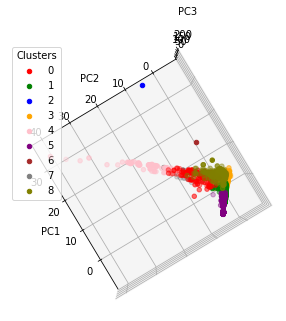

In [30]:
fig = plt.figure(figsize=(5,5))
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[labelsKmeans==0,0], X_test[labelsKmeans==0,1], X_test[labelsKmeans==0,2], c='red')
axis.scatter(X_test[labelsKmeans==1,0], X_test[labelsKmeans==1,1], X_test[labelsKmeans==1,2], c='green')
axis.scatter(X_test[labelsKmeans==2,0], X_test[labelsKmeans==2,1], X_test[labelsKmeans==2,2], c='blue')
axis.scatter(X_test[labelsKmeans==3,0], X_test[labelsKmeans==3,1], X_test[labelsKmeans==3,2], c='orange')
axis.scatter(X_test[labelsKmeans==4,0], X_test[labelsKmeans==4,1], X_test[labelsKmeans==4,2], c='pink')
axis.scatter(X_test[labelsKmeans==5,0], X_test[labelsKmeans==5,1], X_test[labelsKmeans==5,2], c='purple')
axis.scatter(X_test[labelsKmeans==6,0], X_test[labelsKmeans==6,1], X_test[labelsKmeans==6,2], c='brown')
axis.scatter(X_test[labelsKmeans==7,0], X_test[labelsKmeans==7,1], X_test[labelsKmeans==7,2], c='gray')
axis.scatter(X_test[labelsKmeans==8,0], X_test[labelsKmeans==8,1], X_test[labelsKmeans==8,2], c='olive')
#axis.set_title('Relação dos principais componentes com K-Means')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labelsKmeans), title='Clusters')
axis.view_init(90, 150)

# DBSCAN
* Density-Based Spatial Clustering of Applications with Noise
* Bom para a detecção de outliers
* Descobre aleatoriamente o número de clusters

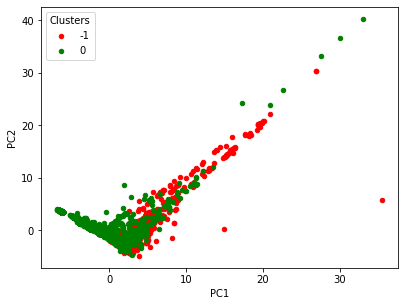

In [31]:
dbscan = DBSCAN()
dbscan.fit(X_test)
labelsdbscan = dbscan.labels_

#Plotando com dois clusters
colors = {-1: 'black',
        0:'red',
        1:'green',
        2:'blue',
        14:'purple',
        24:'grey',
        5:'yellow'}

grouped = pca_df.groupby(' Label')

fig, ax = plt.subplots(figsize=(6.4,4.8))

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='PC1', y='PC2', label=key, color=colors[key])
    
#plt.title('Gráfico do PCA com DBSCAN')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(np.unique(labelsdbscan), title='Clusters')
plt.show()

## Plotando os clusters do DBSCAN em um gráfico 3D

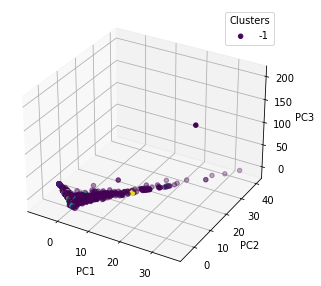

In [32]:
fig = plt.figure(figsize=(5,5))
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=labelsdbscan, marker="o",)
#axis.set_title('Relação dos principais componentes com DBSCAN')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labelsdbscan), title='Clusters')

### Rotacionando o plot 3D para melhor visualização

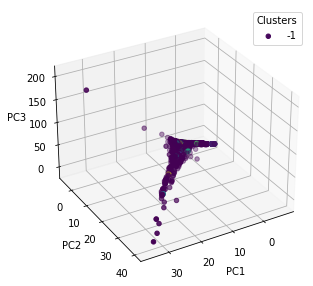

In [33]:
fig = plt.figure(figsize=(5,5))
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=labelsdbscan, marker="o",)
#axis.set_title('Relação dos principais componentes com DBSCAN')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labelsdbscan), title='Clusters')
axis.view_init(30, 60)

#### Vista no sentido positivo de PC3

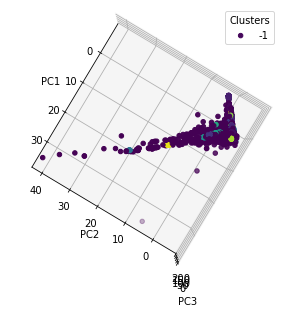

In [34]:
fig = plt.figure(figsize=(5,5))
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=labelsdbscan, marker="o",)
#axis.set_title('Relação dos principais componentes com DBSCAN')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labelsdbscan), title='Clusters')
axis.view_init(-90, 150)

#### Vista no sentido negativo de PC3

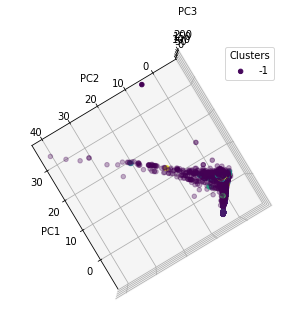

In [35]:
fig = plt.figure(figsize=(5,5))
axis = fig.add_subplot(projection='3d')

# PC1 = X_test[:,0]
# PC2 = X_test[:,1]
# PC3 = X_test[:,2]
axis.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=labelsdbscan, marker="o",)
#axis.set_title('Relação dos principais componentes com DBSCAN')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')
axis.legend(np.unique(labelsdbscan), title='Clusters')
axis.view_init(90, 150)

# Comparando valores obtidos 

In [36]:
pca_df.head(n=15)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Label,,,,,,,,,,
1,-3.526611,1.785890,0.994615,-0.570150,1.052931,-0.289663,-2.631658,0.103141,-0.062320,-0.631128
1,1.912454,-2.363373,-1.585255,-0.897097,1.784117,-0.821843,-0.193306,-0.298965,-0.312214,-0.451580
0,2.505669,-1.953434,2.450705,-0.528893,-1.580508,0.629161,-1.527033,0.080825,-0.589017,-1.819328
0,1.507237,-2.734932,-1.521800,-1.265775,1.729258,-0.661367,0.023112,-0.527439,-0.287088,1.112515
1,-4.004114,1.508231,-0.329269,0.380329,-0.737131,0.269243,2.337469,-0.077009,-1.542011,0.588871
0,2.003718,-3.085194,-1.598703,-0.849999,1.876414,-0.705052,0.060157,-0.265719,-0.056543,1.134283
1,-0.836676,-0.774277,-0.676782,-0.097943,0.469757,-0.342177,-0.309395,-0.103907,0.024554,-0.685123
1,-6.323078,3.631541,0.816832,-0.983074,0.400469,-0.726319,-0.797092,-0.158610,0.093927,0.347105
1,-1.886640,0.188413,-0.393462,0.081232,-0.057759,-0.291783,-0.009918,0.061524,0.268421,-0.016916


In [37]:
labels[:15]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [38]:
labelsKmeans[:15]

array([5, 3, 8, 3, 1, 3, 1, 5, 1, 5, 3, 3, 1, 3, 3])

In [39]:
labelsdbscan[:15]

array([ 0, -1, -1,  1,  2,  1,  0,  3, -1,  0,  1,  4,  2, -1,  1],
      dtype=int64)